In [2]:
import pandas as pd
import numpy as np

from scipy import signal
import matplotlib.pyplot as plt
from scipy import signal, fftpack
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import hilbert, chirp, find_peaks


In [15]:
# Load data dari file Excel

df3 = pd.read_csv('20201221a-1.csv')
# Extract data from specific columns
time = df3['X'].to_numpy()
signal_data = df3['Y'].to_numpy()

# Define the filter parameters
lowcut = 2.0
highcut = 10.0
fs = 100.0
order = 5

In [16]:
df3.head

<bound method NDFrame.head of               X         Y
0      0.483795 -0.035156
1      0.458214 -0.035156
2      0.424586 -0.039062
3      0.384249 -0.007812
4      0.338779  0.117188
...         ...       ...
12475  0.466458 -0.003906
12476  0.489811  0.003906
12477  0.503444 -0.003906
12478  0.506944  1.976562
12479  0.500278  1.519531

[12480 rows x 2 columns]>

In [29]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(Y)  # mencari puncak-puncak dalam sinyal
highest_peak1 = peaks[Y[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(X, Y)
plt.annotate(f'  Highest Peak: {y2[highest_peak1]:.6f}', 
             xy=(X[highest_peak1], 
                 X[highest_peak1]),
             xytext=(X[highest_peak1]+1, Y[highest_peak1]), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Time (us)')
plt.grid()
plt.ylabel('Amplitude (V)')
plt.title('Tulang B')

NameError: name 'Y' is not defined

<Figure size 1000x500 with 0 Axes>

In [17]:
rectified_signal = np.abs(df3)

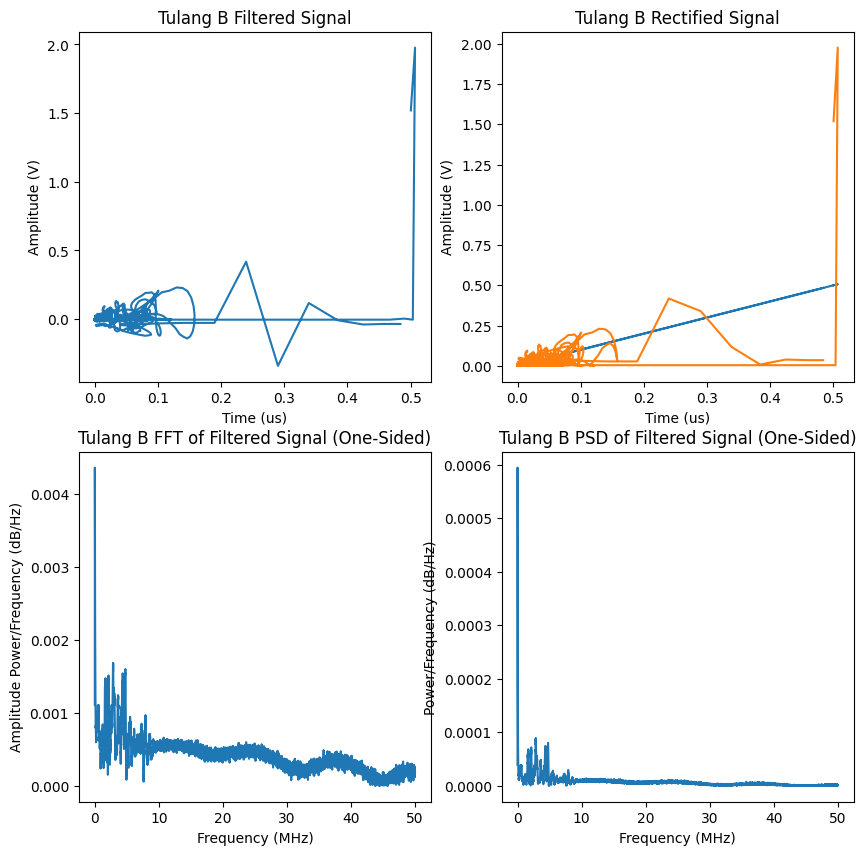

In [25]:
# Perform Fourier transform
signal_fft2 = np.fft.fft(signal_data)
signal_freq2 = np.fft.fftfreq(len(signal_data), 1/fs)

# Perform one-sided FFT (discard negative frequencies)
n = len(signal_data)
freq2 = signal_freq2[0:int(n/2)]
fft_amp2 = np.abs(signal_fft2)[0:int(n/2)]/n*2

# Perform power spectral density (PSD) calculation
psd2 = (1/(fs*n)) * np.square(np.abs(signal_fft2[:n//2]))

# Perform one-sided PSD (discard negative frequencies)
freq_psd2 = signal_freq2[0:int(n/2)]
psd_one_sided2 = psd2[0:int(n/2)]

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, signal_data)
axs[0, 0].set_title('Tulang B Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(time, rectified_signal)
axs[0, 1].set_title('Tulang B Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq2, fft_amp2)
axs[1, 0].set_title('Tulang B FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd2, psd_one_sided2)
axs[1, 1].set_title('Tulang B PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

In [4]:
# Extract data from specific columns
time3 = df3['x'].to_numpy()
signal_data3 = df3['y'].to_numpy()

# Define the filter parameters
lowcut = 2.0
highcut = 10.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
filtered_signal3 = signal.filtfilt(b, a, signal_data3)

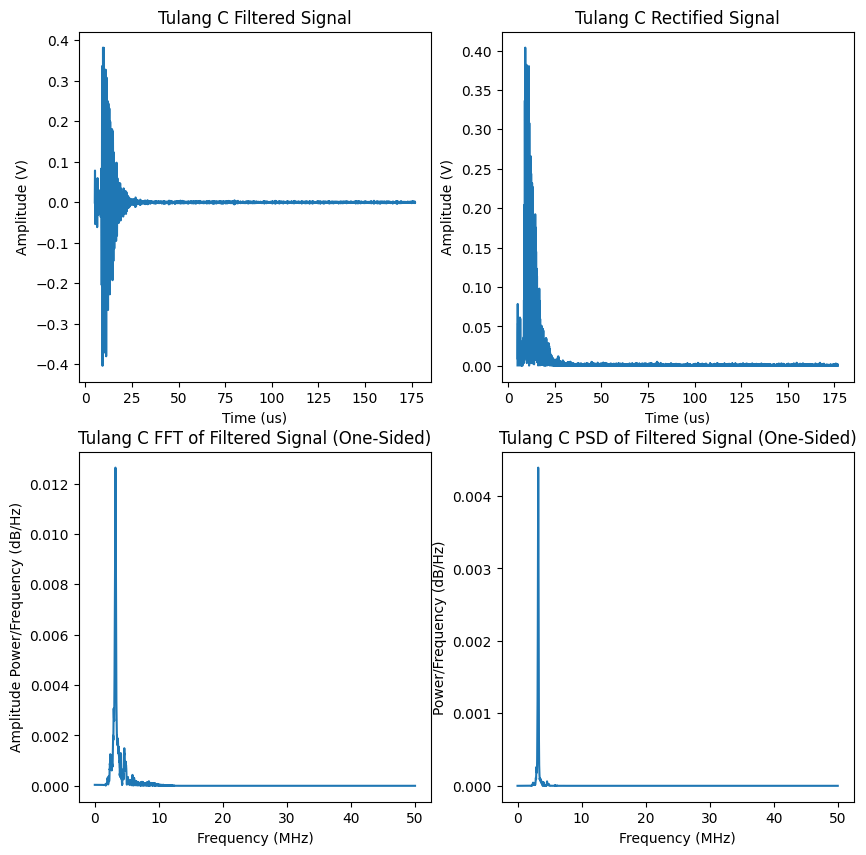

In [5]:
# Rectify the signal (take only the positive values)
rectified_signal3 = np.abs(filtered_signal3)

# Perform Fourier transform
signal_fft3 = np.fft.fft(filtered_signal3)
signal_freq3 = np.fft.fftfreq(len(filtered_signal3), 1/fs)

# Perform one-sided FFT (discard negative frequencies)
n = len(filtered_signal3)
freq3 = signal_freq3[0:int(n/2)]
fft_amp3 = np.abs(signal_fft3)[0:int(n/2)]/n*2

# Perform power spectral density (PSD) calculation
psd3 = (1/(fs*n)) * np.square(np.abs(signal_fft3[:n//2]))

# Perform one-sided PSD (discard negative frequencies)
freq_psd3 = signal_freq3[0:int(n/2)]
psd_one_sided3 = psd3[0:int(n/2)]

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time3, filtered_signal3)
axs[0, 0].set_title('Tulang C Filtered Signal')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude (V)')

axs[0, 1].plot(time3, rectified_signal3)
axs[0, 1].set_title('Tulang C Rectified Signal')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude (V)')

axs[1, 0].plot(freq3, fft_amp3)
axs[1, 0].set_title('Tulang C FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (MHz)')
axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

axs[1, 1].plot(freq_psd3, psd_one_sided3)
axs[1, 1].set_title('Tulang C PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (MHz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.show()

Text(0, 0.5, 'Amplitude (V)')

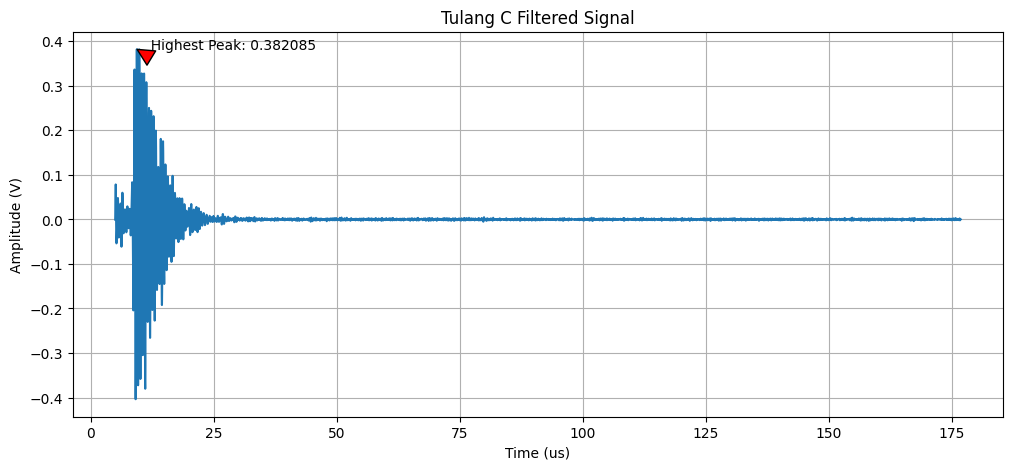

In [6]:
plt.figure(figsize=(12,5))

peaks, _ = find_peaks(filtered_signal3)  # mencari puncak-puncak dalam sinyal
highest_peak2 = peaks[filtered_signal3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(time3, filtered_signal3)
plt.annotate(f'  Highest Peak: {filtered_signal3[highest_peak2]:.6f}', 
             xy=(time3[highest_peak2], 
                 filtered_signal3[highest_peak2]),
             xytext=(time3[highest_peak2]+1, filtered_signal3[highest_peak2]), 
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Tulang C Filtered Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (V)')

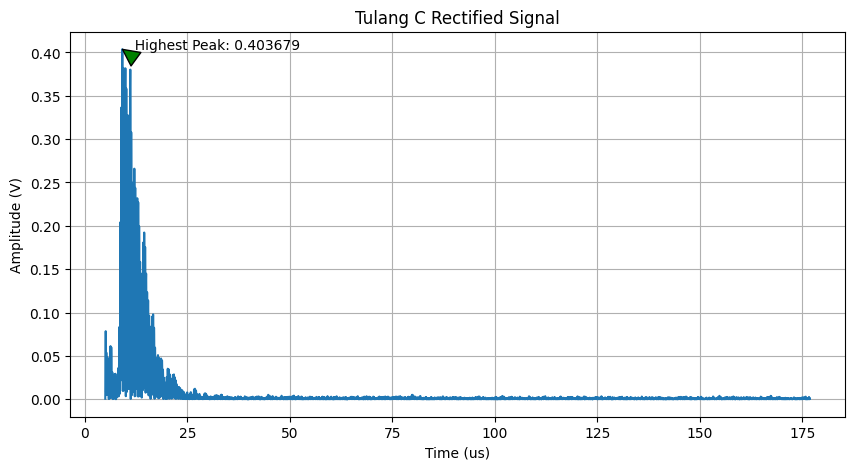

In [7]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(rectified_signal3)  # mencari puncak-puncak dalam sinyal
highest_peak3 = peaks[rectified_signal3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(time3, rectified_signal3)
plt.annotate(f'  Highest Peak: {rectified_signal3[highest_peak3]:.6f}', 
             xy=(time3[highest_peak3], 
                 rectified_signal3[highest_peak3]),
             xytext=(time3[highest_peak3]+1, rectified_signal3[highest_peak3]), 
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.title('Tulang C Rectified Signal')
plt.grid()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')

Text(0, 0.5, 'Amplitude (dB/Hz)')

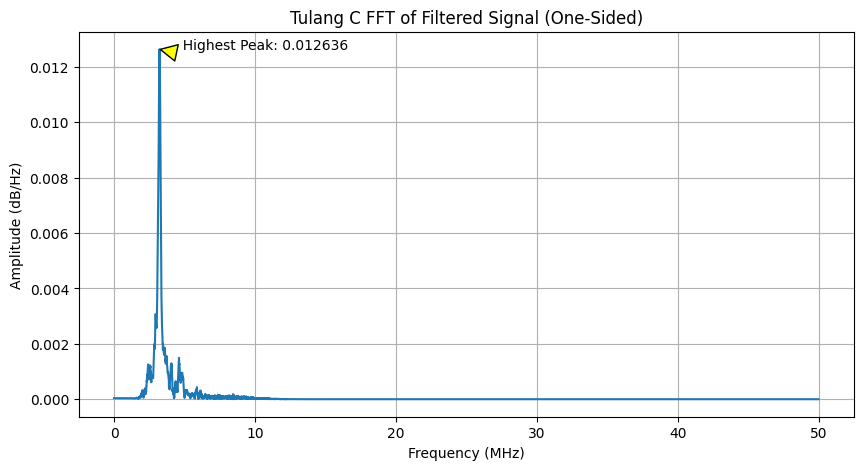

In [8]:
plt.figure(figsize=(10,5))
peaks, _ = find_peaks(fft_amp3)  # mencari puncak-puncak dalam sinyal
highest_peak4 = peaks[fft_amp3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq3, fft_amp3)
plt.annotate(f'  Highest Peak: {fft_amp3[highest_peak4]:.6f}', 
             xy=(freq3[highest_peak4], 
                 fft_amp3[highest_peak4]),
             xytext=(freq3[highest_peak4]+1, fft_amp3[highest_peak4]), 
             arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.title('Tulang C FFT of Filtered Signal (One-Sided)')
plt.grid()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB/Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

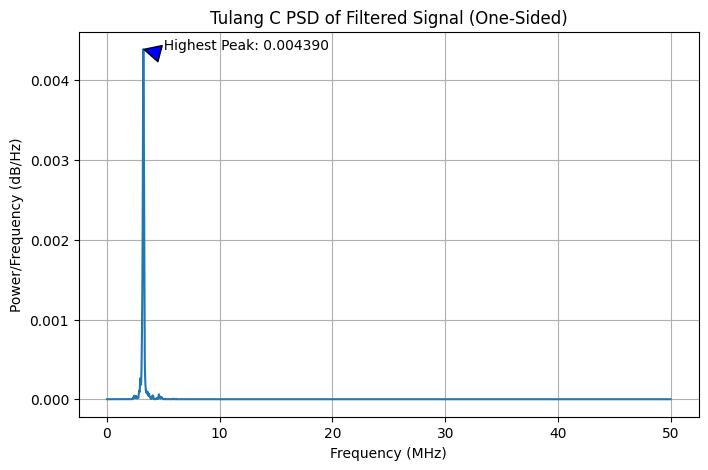

In [9]:
plt.figure(figsize=(8,5))
peaks, _ = find_peaks(psd_one_sided3)  # mencari puncak-puncak dalam sinyal
highest_peak5 = peaks[psd_one_sided3[peaks].argmax()]  # mencari puncak tertinggi

plt.plot(freq_psd3, psd_one_sided3)
plt.annotate(f'  Highest Peak: {psd_one_sided3[highest_peak5]:.6f}', 
             xy=(freq_psd3[highest_peak5], 
                 psd_one_sided3[highest_peak5]),
             xytext=(freq_psd3[highest_peak5]+1, psd_one_sided3[highest_peak5]), 
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('Tulang C PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (MHz)')
plt.grid()
plt.ylabel('Power/Frequency (dB/Hz)')